# Steps followed in Analysis:
1. Import all the modules
2. Import the dataset
3. Check the dataset
4. Drop the useless columns
5. Aggregate the rows as per requirement
6. Visualize the data
    6.1 Normally plot the data using loc() and plot()
    6.2 Use the first derivative using loc() ,diff() and plot()
    6.3 Find the maximum infection rate using loc() ,diff(), plot() and max()
    6.4 Create a new column for maximum infection rate and add it to the existing dataset
7. Import the other dataset .i.e happyness index
8. Preprocess the newly added dataset remove the useless columns
9. Join() the two datasets i.e newly created max infection rate dataset with only one column and the other happyness index dataset use copy() at end means any changes in 1st dataset will be reflected in 2nd and vice versa
10. Use corr() to find the correlation between 2 columns 
11. Use scatterplot() and regplot() for that optimal regression line (Always take x as a column and y column as max infection rate using log to scale down the value)

# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
data=pd.read_csv('covid19_Confirmed_dataset.csv')

# Checking the shape of dataframe

In [3]:
data.shape

(266, 104)

In [5]:
data.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006


In [6]:
data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
data.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
265,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


# Deleting the useless columns

In [8]:
# axis 1 is used for row wise operation and here lat and long is not used so dropping it
data.drop(columns='Lat',inplace=True) # Delete lat column

KeyError: "['Lat'] not found in axis"

In [10]:
data.drop(columns='Long',inplace=True) # delete long column

In [11]:
data

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Aggregating rows by the country/Region

In [16]:
data_aggregated=data.groupby('Country/Region').sum()

In [138]:
data_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max Infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [18]:
data_aggregated.shape

(187, 100)

# Visualizing data related to china

In [28]:
data_aggregated.dtypes #dtypes

1/22/20    int64
1/23/20    int64
1/24/20    int64
1/25/20    int64
1/26/20    int64
           ...  
4/26/20    int64
4/27/20    int64
4/28/20    int64
4/29/20    int64
4/30/20    int64
Length: 100, dtype: object

In [219]:
def plot_chart(country):
    for i in country:
        data_aggregated.loc[i].plot() #LOC function is similar to slicing operator in list
        plt.legend()

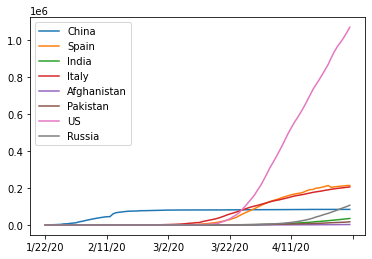

In [92]:
plot_chart(['China','Spain','India','Italy','Afghanistan','Pakistan','US','Russia'])

# calculating first derivative of curve

In [75]:
def first_derivative(country):
    for i in country:
        data_aggregated.loc[i].diff().plot()
        plt.legend()

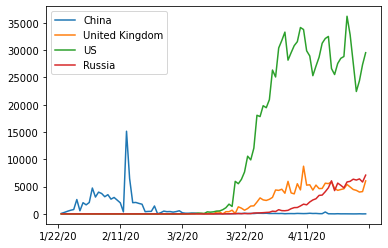

In [93]:
first_derivative(['China','United Kingdom','US','Russia'])

# Find maximum infection rate for china

In [98]:
def max_first_derivative(country):
    for i in country:
        return data_aggregated.loc[i].diff().max()

In [102]:
max_first_derivative(['India'])

1893.0

# Find maximum infection rate for all the countries

In [113]:
countries=list(data_aggregated.index)
max_infection_rate=[]
for i in countries:
    max_infection_rate.append(data_aggregated.loc[i].diff().max())
data_aggregated['Max Infection rate']=max_infection_rate #Creates the new column with name max infection rate

In [114]:
data_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max Infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


# Create a new/separate dataset with only needed column

In [121]:
new_df=pd.DataFrame(data_aggregated['Max Infection rate'])

In [128]:
new_df.sort_values('Max Infection rate',ascending=False).head(10)

,Max Infection rate
Country/Region,
US,36188.0
France,26849.0
China,15136.0
Ecuador,11536.0
Spain,9630.0
United Kingdom,8733.0
Brazil,7502.0
Russia,7099.0
Germany,6933.0


# Happy dataset New*

In [129]:
happy_data=pd.read_csv('worldwide_happiness_report.csv')

In [130]:
happy_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [131]:
happy_data.shape

(156, 9)

# Drop the useless column

In [142]:
happy_data.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [150]:
columns_to_be_deleted=['Overall rank','Score','Perceptions of corruption','Generosity']
happy_data.drop(columns=columns_to_be_deleted,inplace=True)

In [151]:
happy_data.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


# Changing the indices of DataFrame

In [160]:
happy_data.set_index('Country or region',inplace=True)

In [166]:
new_df.head()

,Max Infection rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [163]:
data_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max Infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


# Lets join the two dataset

In [165]:
happy_data.merge(data_aggregated,how='inner',left_on='Country or region',right_on='Country/Region')

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max Infection rate
0,1.340,1.587,0.986,0.596,0,0,0,0,0,0,...,4129,4284,4395,4475,4576,4695,4740,4906,4995,267.0
1,1.383,1.573,0.996,0.592,0,0,0,0,0,0,...,8108,8271,8408,8643,8773,8896,9049,9206,9356,391.0
2,1.488,1.582,1.028,0.603,0,0,0,0,0,0,...,7338,7401,7463,7499,7527,7599,7660,7710,7738,386.0
3,1.380,1.624,1.026,0.591,0,0,0,0,0,0,...,1785,1789,1789,1790,1792,1792,1795,1797,1797,99.0
4,1.396,1.522,0.999,0.557,0,0,0,0,0,0,...,35032,35921,36729,37384,38040,38440,38612,38998,39512,1346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.359,0.711,0.614,0.555,0,0,0,0,0,0,...,153,154,176,183,191,207,212,225,243,22.0
139,0.476,0.885,0.499,0.417,0,0,0,0,0,0,...,284,284,299,299,299,299,299,480,480,181.0
140,0.350,0.517,0.361,0.000,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
141,0.026,0.000,0.105,0.225,0,0,0,0,0,0,...,14,16,16,16,19,19,50,50,50,31.0


In [171]:
new_df.head()

,Max Infection rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [172]:
happy_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [173]:
new_df.merge(happy_data,left_on='Country/Region',right_on='Country or region')

,Max Infection rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,232.0,0.350,0.517,0.361,0.000
1,34.0,0.947,0.848,0.874,0.383
2,199.0,1.002,1.160,0.785,0.086
3,291.0,1.092,1.432,0.881,0.471
4,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
138,29.0,0.960,1.427,0.805,0.154
139,19.0,0.741,1.346,0.851,0.543
140,5.0,0.287,1.163,0.463,0.143
141,9.0,0.578,1.058,0.426,0.431


In [174]:
data=happy_data.join(new_df).copy()

In [175]:
data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Max Infection rate
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0


In [176]:
data2=new_df.join(happy_data).copy()

In [177]:
data2.head()

,Max Infection rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,,
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Andorra,43.0,NaN,NaN,NaN,NaN
Angola,5.0,NaN,NaN,NaN,NaN


# Correlation Matrix

In [178]:
# shows the relation between the two columns 1-0.6-0.5-> Great, Strong, weak <0.5
data.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Max Infection rate
GDP per capita,1.000000,0.754906,0.835462,0.379079,0.250118
Social support,0.754906,1.000000,0.719009,0.447333,0.191958
Healthy life expectancy,0.835462,0.719009,1.000000,0.390395,0.289263
Freedom to make life choices,0.379079,0.447333,0.390395,1.000000,0.078196
Max Infection rate,0.250118,0.191958,0.289263,0.078196,1.000000


# Visualization of results

In [180]:
data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Max Infection rate
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max Infection rate'>

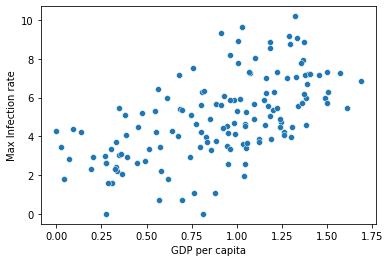

In [201]:
x=data['GDP per capita']
y=data['Max Infection rate']
sns.scatterplot(x,np.log(y)) #to bring the values closer to x value we have used log here import it from numpy module

In [203]:
np.log(y) #log is natural log i.e log(e)x=5.58, where x=267.
#e is 2.71 exponent wise it can also be written as 2.71^5.53 which will give you the output approx 265.07
#np.log(y) --> output will be 5.58 --> ln(267)=5.58
#OR## e^5.58=~265 (ALWAYS REMEMBER BASE WILL ALWAYS BE THE BASE)

Country or region
Finland                     5.587249
Denmark                     5.968708
Norway                      5.955837
Iceland                     4.595120
Netherlands                 7.204893
                              ...   
Rwanda                      3.091042
Tanzania                    5.198497
Afghanistan                 5.446737
Central African Republic    3.433987
South Sudan                 3.332205
Name: Max Infection rate, Length: 156, dtype: float64

In [184]:
x

Country or region
Finland                     1.340
Denmark                     1.383
Norway                      1.488
Iceland                     1.380
Netherlands                 1.396
                            ...  
Rwanda                      0.359
Tanzania                    0.476
Afghanistan                 0.350
Central African Republic    0.026
South Sudan                 0.306
Name: GDP per capita, Length: 156, dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max Infection rate'>

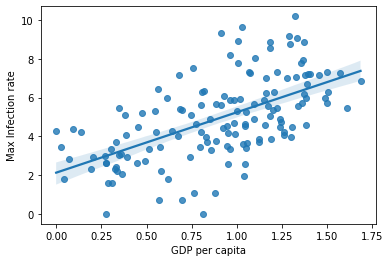

In [199]:
sns.regplot(x,np.log(y))

# Ploting social support and infection rate

In [205]:
data.dtypes

GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Max Infection rate              float64
dtype: object

In [206]:
x1=data['Social support']
x2=data['Max Infection rate']

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Max Infection rate'>

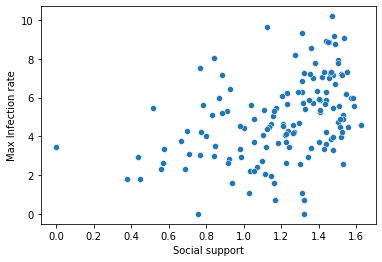

In [207]:
sns.scatterplot(x1,np.log(x2))

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Max Infection rate'>

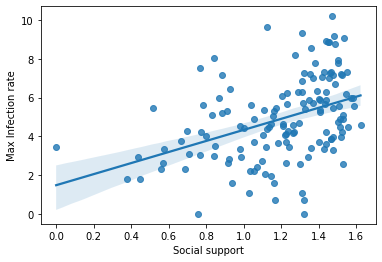

In [208]:
sns.regplot(x1,np.log(x2))

# Ploting Healthy life expectancy and infection rate

In [209]:
data.dtypes

GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Max Infection rate              float64
dtype: object

In [210]:
x3=data['Healthy life expectancy']
y3=data['Max Infection rate']

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max Infection rate'>

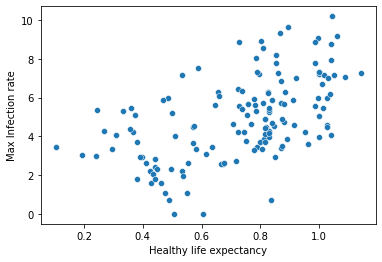

In [212]:
sns.scatterplot(x3,np.log(y3))

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max Infection rate'>

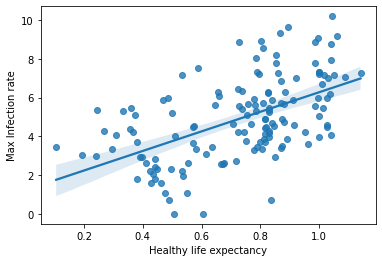

In [213]:
sns.regplot(x3,np.log(y3))

# Ploting Freedom to make life choice and infection rate

In [214]:
data.dtypes

GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Max Infection rate              float64
dtype: object

In [215]:
x4=data['Freedom to make life choices']
y4=np.log(data['Max Infection rate'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Max Infection rate'>

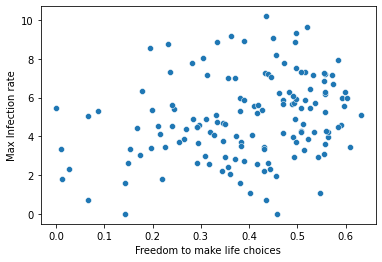

In [216]:
sns.scatterplot(x4,y4)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Max Infection rate'>

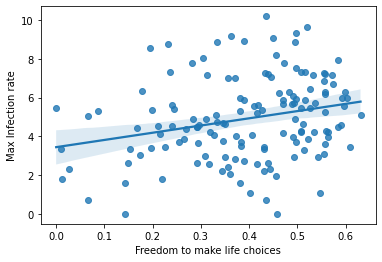

In [217]:
sns.regplot(x4,y4)